In [10]:
import numpy as np
import pandas as pd
import itertools as it
from sklearn.neighbors import KernelDensity

import importlib
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
import bayseg

In [2]:
# data import
data = pd.read_csv("../data/training_data.csv")                         # load the data from excel sheet  
feature_names =  ['ILD_log10','DeltaPHI','PE','PHIND']#,'GR']    # define data that are considered by headers from excel sheet(Gamma Ray,Induction, Neutron-density, delta Neutron-density, Photoelectric effect)
BH1 = data.loc[np.where(data == 'SHRIMPLIN')[0],feature_names]             # extract all feature of one borehole
coords = data.loc[np.where(data == 'SHRIMPLIN')[0],'Depth']

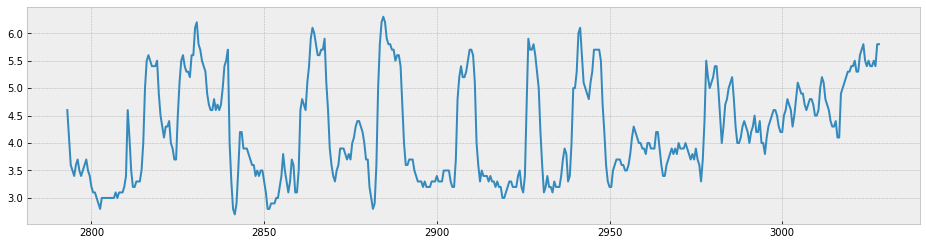

In [3]:
plt.figure(figsize = (16,4))
plt.plot(coords,BH1.loc[:,'PE'])

In [4]:
BH1_norm = bayseg.normalize_feature_vectors(BH1) # normalize data (.values just takes the values not the header and indicies)

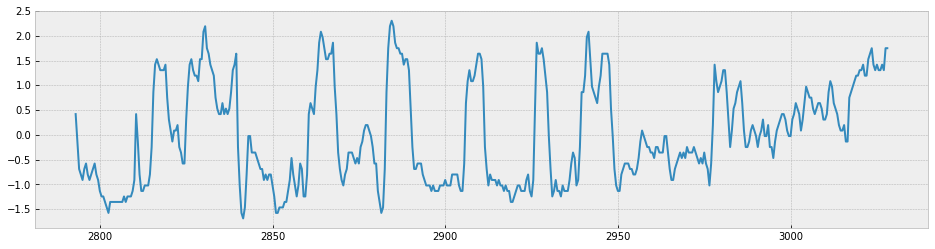

In [5]:
plt.figure(figsize = (16,4))
plt.plot(coords,BH1_norm.loc[:,'PE'])

In [81]:
X = [BH1_norm.loc[:,'PE']]

In [82]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)

In [85]:
kde

KernelDensity(algorithm='auto', atol=0, bandwidth=0.75, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [77]:
Y = []
for i in range(0,len(X)):
    Y.append(kde[i][0])

TypeError: 'KernelDensity' object does not support indexing

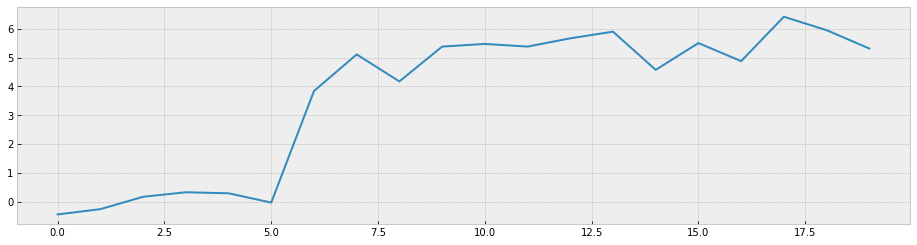

In [75]:
plt.figure(figsize = (16,4))
plt.plot(np.arange(0,20),Y)